# Regression Week 1: Simple Linear Regression

## Assignment in quiz 2
In this notebook we will use data on house sales in King County to predict house prices using simple (one input) linear regression. You will:
* Use graphlab SArray and SFrame functions to compute important summary statistics
* Write a function to compute the Simple Linear Regression weights using the closed form solution
* Write a function to make predictions of the output given the input feature
* Turn the regression around to predict the input given the output
* Compare two different models for predicting house prices

In this notebook you will be provided with some already complete code as well as some code that you should complete yourself in order to answer quiz questions. The code we provide to complte is optional and is there to assist you with solving the problems but feel free to ignore the helper code and write your own. *I will complete all the code with Numpy, Pandas...*

### Import the needed modules

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from IPython.display import display, HTML
#This way the plots appear in the notebook and not thrown as popups
%matplotlib inline

### Load house sales data

Dataset is from house sales in King County, the region where the city of Seattle, WA is located.

In [2]:
sales = pd.read_csv('kc_house_data.csv')
train_data = pd.read_csv('kc_house_train_data.csv')
test_data = pd.read_csv('kc_house_test_data.csv')

#### Create a Simple linear regression function

The simple linear regression model was demonstrated in the lesson using the Gradient Descend method.

In [3]:
def simple_linear_regression(input_feature, output):
    y_sum = np.sum(output)
    x_sum = np.sum(input_feature)
    yx_sum = np.sum(input_feature*output)
    x2_sum = np.sum(input_feature**2)
    n = float(len(input_feature))
    slope = (yx_sum - y_sum*x_sum/n)/(x2_sum - (x_sum**2)/n)
    intercept = y_sum/n - slope*x_sum/n
    return (intercept, slope)

The previous function will calculate the only parameters needed to build a simple linear regression model: incercept and slope. The train data are the 2 parameters passed in the function (all X axis array in the first parameter and their corresponding Y values in the second parameter). For example, let's suppose the training data is: ([1,4],[2,6],[3,8])

In [4]:
x_train_example = np.array([1,2,3])
y_train_example = np.array([4,6,8])
intercept_example, slope_example = simple_linear_regression(x_train_example, y_train_example)

Remember this means that the linear model with the train data given would represent a line that crosses the Y axis at (0, 2) and grows 2 units in the Y axis every 1 unit in the X axis.

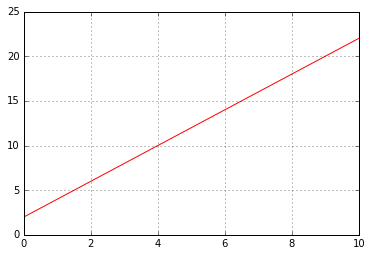

In [5]:
x = np.linspace(0, 10, 20, endpoint=True)
y = intercept_example + (slope_example * x)
plt.plot(x, y, '-r')
plt.grid()

Now, let's work with the data given!

In [6]:
sqft_intercept, sqft_slope = simple_linear_regression(train_data['sqft_living'], train_data['price'])
print "Intercept:\t" + str(sqft_intercept)
print "Slope:\t\t" + str(sqft_slope)

Intercept:	-47116.0790729
Slope:		281.95883963


#### Predicting values

As we did before (manually), to predict a value based on a linear regression model we need the input variable x_known and the intercept and slope variables of the model, calculated from the train data.

In [7]:
def get_regression_predictions(input_feature, intercept, slope):
    return intercept + slope*input_feature

**Question 1**: Using your Slope and Intercept from (4), What is the predicted price for a house with 2650 sqft?

In [8]:
my_house_sqft = 2650
estimated_price = get_regression_predictions(my_house_sqft, sqft_intercept, sqft_slope)
print "The estimated price for a house with %d squarefeet is $%.2f" % (my_house_sqft, estimated_price)

The estimated price for a house with 2650 squarefeet is $700074.85


#### Residual Sum of Squares

Now that we have a model and can make predictions let's evaluate our model using Residual Sum of Squares (RSS). Recall that RSS is the sum of the squares of the residuals and the residuals is just a fancy word for the difference between the predicted output and the true output.

In [9]:
def get_residual_sum_of_squares(input_feature, output, intercept, slope):
    pred = get_regression_predictions(input_feature, intercept, slope)
    residuals = (output-pred)**2
    RSS = np.sum(residuals)
    return(RSS)

Let's test our get_residual_sum_of_squares function by applying it to the test model where the data lie exactly on a line. Since they lie exactly on a line the residual sum of squares should be zero!

In [10]:
print get_residual_sum_of_squares(x_train_example,y_train_example,intercept_example,slope_example)

0.0


Now use your function to calculate the RSS on training data from the squarefeet model calculated above.

**Quiz Question 2**: According to this function and the slope and intercept from the squarefeet model What is the RSS for the simple linear regression using squarefeet to predict prices on TRAINING data?

In [11]:
rss_prices_on_sqft = get_residual_sum_of_squares(train_data['sqft_living'], train_data['price'], sqft_intercept, sqft_slope)
print 'The RSS of predicting Prices based on Square Feet is : ' + str(rss_prices_on_sqft)

The RSS of predicting Prices based on Square Feet is : 1.20191835418e+15


#### Predict the squarefeet given price

What if we want to predict the squarefoot given the price? Since we have an equation y = a + b*x we can solve the function for x. So that if we have the intercept (a) and the slope (b) and the price (y) we can solve for the estimated squarefeet (x).

In [12]:
def inverse_regression_predictions(output, intercept, slope):
    # solve output = intercept + slope*input_feature for input_feature. Use this equation to compute the inverse predictions:
    estimated_feature = (output-intercept)/float(slope)
    return estimated_feature

**Quiz Question 3**: According to this function and the regression slope and intercept from (3) what is the estimated square-feet for a house costing $800,000?

In [13]:
my_house_price = 800000
estimated_squarefeet = inverse_regression_predictions(my_house_price, sqft_intercept, sqft_slope)
print "The estimated squarefeet for a house worth $%.2f is %d" % (my_house_price, estimated_squarefeet)

The estimated squarefeet for a house worth $800000.00 is 3004


#### New Model: estimate prices from bedrooms

We have made one model for predicting house prices using squarefeet, but there are many other features in the sales data. Use your simple linear regression function to estimate the regression parameters from predicting Prices based on number of bedrooms. Use the training data!

In [14]:
# Estimate the slope and intercept for predicting 'price' based on 'bedrooms'
bed_intercept, bed_slope = simple_linear_regression(train_data['bedrooms'], train_data['price'])

#### Test your Linear Regression Algorithm

Now we have two models for predicting the price of a house. How do we know which one is better? Calculate the RSS on the TEST data (remember this data wasn't involved in learning the model). Compute the RSS from predicting prices using bedrooms and from predicting prices using squarefeet.

**Quiz Question 4**: Which model (square feet or bedrooms) has lowest RSS on TEST data? Think about why this might be the case.

In [15]:
# Compute RSS when using bedrooms on TEST data:
rss_prices_on_bed = get_residual_sum_of_squares(test_data['bedrooms'], test_data['price'], bed_intercept, bed_slope)
print 'The RSS of predicting Prices based on Bedrooms is : ' + str(rss_prices_on_bed)
# Compute RSS when using squarefeet on TEST data:
rss_prices_on_sqft = get_residual_sum_of_squares(test_data['sqft_living'], test_data['price'], sqft_intercept, sqft_slope)
print 'The RSS of predicting Prices based on constructed area is : ' + str(rss_prices_on_sqft)

The RSS of predicting Prices based on Bedrooms is : 4.9336458596e+14
The RSS of predicting Prices based on constructed area is : 2.75402933618e+14


And therefore, predicting house prices based on constructed area yields a more accurate prediction.